<a href="https://colab.research.google.com/github/Madihajavaid12345/Data-analytics-level-1-task-2-Elevvo/blob/main/Data_analytics_level_1_task_2_Elevvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis Report
### Submitted by: Madiha Rehan


 ## Overview:

This notebook explores the Titanic dataset to uncover insights into survival patterns among passengers.
It uses visualizations and statistical analysis to better understand the effects of features like
passenger class, gender, age, and embarkation point on survival chances.

 ## Dataset Information:
- Source: Titanic Dataset (Kaggle / seaborn)
- Total Records: [number of rows]
- Features Used: Pclass, Sex, Age, Fare, Embarked, Survived, etc.

## Key Analyses:
- Distribution of passengers by class and gender
- Survival rate by class and gender
- Age distribution among survivors and non-survivors
- Embarkation port trends
- Data cleaning (missing values handled and visualized)
- Bar charts, pie charts, and count plots used for better understanding

## Tools Used:
- Python (pandas, seaborn, matplotlib)
- Google colab
- Data visualizations to make findings more interpretable

## Objective:
To analyze patterns in the Titanic data that influenced survival rates and improve understanding
of basic data analysis techniques.

## Final Output:
Cleaned and visually rich notebook with insights and plots, ready for review.



In [ ]:
# Step 1: Import important libraries
import pandas as pd                    # For data handling
import seaborn as sns                 # For data visualization
import matplotlib.pyplot as plt       # For additional plotting


In [ ]:
# Step 2: Load the Titanic dataset (adjust the path if needed)
df = pd.read_csv("/content/titanic  datasset.csv")

# Step 3: Show the first 5 rows to understand the data
print(df.head())

# Step 4: Check the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Step 5: Show general information about dataset (columns, types, missing)
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Da

In [ ]:
# Step 7: Check how many missing values are there in each column
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
 # Step 8: Handle missing values
# Fill missing age values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing embarked values with the mode (most common)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column as it has too many missing values
df = df.drop('Cabin', axis=1)

In [ ]:
# Step 9: Convert data types if needed (e.g., 'Sex' and 'Embarked' to category)
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [ ]:
# Step 10: Check cleaned data info again
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.8+ KB
None


In [ ]:
# Step 11: Grouped analysis – survival by gender
print("Survival by Gender:")
print(df.groupby('Sex')['Survived'].mean())


Survival by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-20-3795111283.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean())


In [ ]:
# Step 12: Grouped analysis – survival by passenger class
print("Survival by Class:")
print(df.groupby('Pclass')['Survived'].mean())


Survival by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


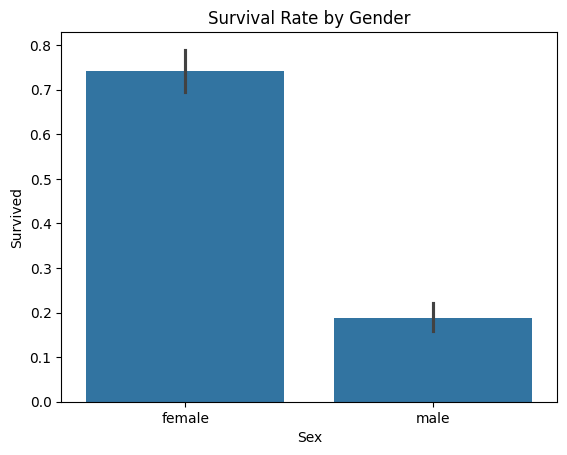

In [39]:
# Step 13: Plot survival rate by gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')

plt.show()

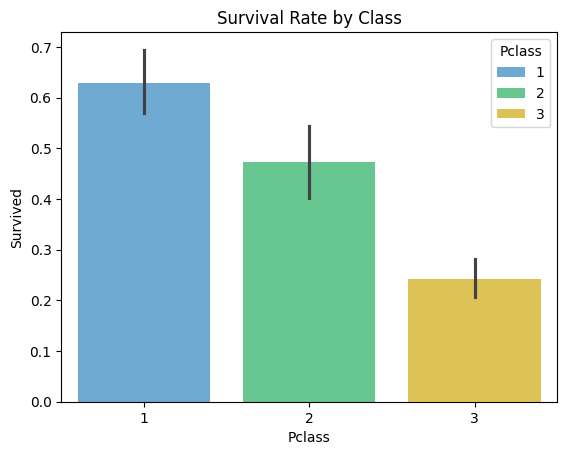

In [38]:
# Step 14: Plot survival rate by passenger class
custom_colors = ['#5DADE2', '#58D68D', '#F4D03F']
sns.barplot(data=df, x='Pclass', y='Survived', hue='Pclass', palette=custom_colors)
plt.title('Survival Rate by Class')
plt.show()

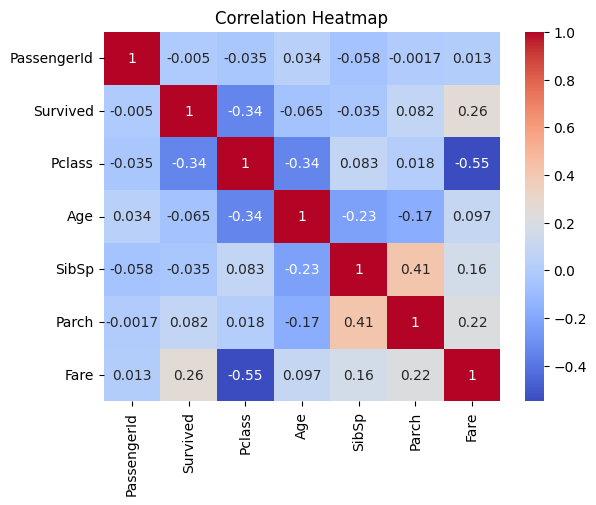

In [ ]:
# Step 15: Create a heatmap for correlation between numeric columns only

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Create a heatmap to show correlations
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
